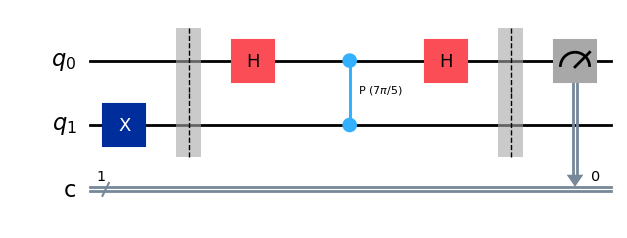

In [1]:
from math import pi, cos, sin, acos, sqrt
from qiskit import QuantumCircuit

theta = 0.7  # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2 * pi * theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
display(qc.draw('mpl'))

In [2]:
from qiskit.primitives import Sampler

results = Sampler().run(qc).result().quasi_dists[0]
k = results[0]
theta_meas = acos(-sqrt(k))/pi
display(results)

print("Theta measured: ")
print(theta_meas)


print("Expected results: ")
display({   # Calculate predicted results
    0: cos(pi * theta) ** 2,
    1: sin(pi * theta) ** 2
})

/tmp/ipykernel_9220/3657852451.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(qc).result().quasi_dists[0]


{0: np.float64(0.345491502812526), 1: np.float64(0.654508497187474)}

Theta measured: 
0.7
Expected results: 


{0: 0.34549150281252616, 1: 0.6545084971874737}